<h1 style="text-align:center;">Introdução à Otimização &ndash; Professor Amit Bhaya &ndash; 2022/2</h1>
<h2 style="text-align:center;">Lista 1</h2>
<h2 style="text-align:center;">Entrega: 03 de outubro de 2022

In [1]:
#import Pkg; Pkg.add("PyPlot")
@time using Clp
@time using JuMP
@time using PyPlot
@time using LinearAlgebra
@time using NamedArrays

 22.419653 seconds (9.12 M allocations: 640.205 MiB, 7.13% gc time, 6.05% compilation time: 90% of which was recompilation)
  3.143251 seconds (1.21 M allocations: 71.750 MiB, 4.96% gc time, 58.69% compilation time: 100% of which was recompilation)
 14.087476 seconds (7.13 M allocations: 377.076 MiB, 2.51% gc time, 57.09% compilation time: 26% of which was recompilation)
  6.039644 seconds (2.55 M allocations: 129.751 MiB, 1.70% gc time, 99.99% compilation time: 100% of which was recompilation)
  0.357303 seconds (180.67 k allocations: 13.293 MiB, 10.20% compilation time: 14% of which was recompilation)


In [2]:
versioninfo()

Julia Version 1.8.1
Commit afb6c60d69 (2022-09-06 15:09 UTC)
Platform Info:
  OS: Windows (x86_64-w64-mingw32)
  CPU: 12 × Intel(R) Core(TM) i7-9750H CPU @ 2.60GHz
  WORD_SIZE: 64
  LIBM: libopenlibm
  LLVM: libLLVM-13.0.1 (ORCJIT, skylake)
  Threads: 1 on 12 virtual cores


## Problema 1: (Forma padrão de um programa linear) 

Considere o problema de otimização abaixo:

$$
\begin{array}{rlr}
\max & 4x_1 - 2x_2 + x_3 &\\
& -x_1 + 3x_2 - x_3 & \geq -1 \\
& 5x_2 + 3x_3 & = 5\\
& x_1 + x_2 + x_3 & \leq 1 \\
& x_2 & \geq -1 \\
& x_3 & \geq -2 \\
& x_3 & \leq 2
\end{array}
$$

 - Resolva o programa linear (PL), utilizando JuMP/Julia.
 - Transforme o PL abaixo à forma padrão $\max {c}^\top {x}$, sujeito a ${Ax}\leq {b}, {x}\geq 0$. Resolva de novo em JuMP, utilizando a forma padrão matricial. Compare as duas soluções obtidas.

### Solução do problem 1: Insira sua solução na célula abaixo!

In [4]:
#Transforme o PL abaixo à forma padrão max c^T x, s.a. Ax<=b,x>= 0

m = Model(Clp.Optimizer)
@variable(m, u >= 0) #x1 = u - v
@variable(m, v >= 0)
@variable(m, w >= 0) # x3 = w - 2
#@variable(m, -x2 <= 1)
@variable(m, q >= 0) # x2 = q - 1

@constraint(m, (w-2) <= 2)
@constraint(m, (u-v) - 3(q-1) + (w-2) <= 1) 
@constraint(m, -5(q-1) - 3(w-2) <= -5 )
@constraint(m, 5(q-1) + 3(w-2) <= 5 )
@constraint(m, (u-v) + (q-1) + (w-2) <= 1)

@objective(m, Max, 4(u-v) - 2(q-1) + (w-2))

optimize!(m)

println(m)

println("max:", objective_value(m))
println("x_1 = ", value(u-v) )
println("x_2 = ", value(q-1) )
println("x_3 = ", value(w-2) )

Max 4 u - 4 v - 2 q + w
Subject to
 w <= 4.0
 u - v + w - 3 q <= 0.0
 -3 w - 5 q <= -16.0
 3 w + 5 q <= 16.0
 u - v + w + q <= 4.0
 u >= 0.0
 v >= 0.0
 w >= 0.0
 q >= 0.0

max:-0.9999999999999996
x_1 = -0.6666666666666665
x_2 = 0.0
x_3 = 1.6666666666666665
Coin0506I Presolve 4 (-1) rows, 4 (0) columns and 12 (-1) elements
Clp0006I 0  Obj -1.4 Primal inf 2.499999 (1) Dual inf 4.999998 (2)
Clp0006I 4  Obj -1
Clp0000I Optimal - objective value -1
Coin0511I After Postsolve, objective -1, infeasibilities - dual 0 (0), primal 0 (0)
Clp0032I Optimal objective -1 - 4 iterations time 0.012, Presolve 0.01


In [12]:
#forma padrão matricial

# we defined the vector x to be: x = [u;  v;  w; q]
A = 
[0 0 1 0;
 1 -1 1 -3; 
 0 0 -3 -5;
 0 0 3 5; 
 1 -1 1 1]

b = [4; 0; -16; 16; 4]
c = [4; -4; 1; -2]

m = Model(Clp.Optimizer)
@variable(m, x[1:4] >= 0 )      # specify a vector variable
@constraint(m, A*x .<= b )      # the dot in front of <=, which indicates element-wise (vector) inequalities
@objective(m, Max, dot(c,x) )   # must use dot(c,x) or (c'*x)[1] to return a scalar

optimize!(m)

println(m)

println("max:", objective_value(m))
println("x_1 = ", value(x[1]) )
println("x_2 = ", value(x[2]) )
println("x_3 = ", value(x[3] ))
println("x_4 = ", value(x[4] ))

Max 4 x[1] - 4 x[2] + x[3] - 2 x[4]
Subject to
 x[3] <= 4.0
 x[1] - x[2] + x[3] - 3 x[4] <= 0.0
 -3 x[3] - 5 x[4] <= -16.0
 3 x[3] + 5 x[4] <= 16.0
 x[1] - x[2] + x[3] + x[4] <= 4.0
 x[1] >= 0.0
 x[2] >= 0.0
 x[3] >= 0.0
 x[4] >= 0.0

max:-0.9999999999999996
x_1 = 0.0
x_2 = 0.6666666666666665
x_3 = 3.6666666666666665
x_4 = 1.0
Coin0506I Presolve 4 (-1) rows, 4 (0) columns and 12 (-1) elements
Clp0006I 0  Obj -1.4 Primal inf 2.499999 (1) Dual inf 4.999998 (2)
Clp0006I 4  Obj -1
Clp0000I Optimal - objective value -1
Coin0511I After Postsolve, objective -1, infeasibilities - dual 0 (0), primal 0 (0)
Clp0032I Optimal objective -1 - 4 iterations time 0.002, Presolve 0.00


## Problema 2: (Solução gráfica de um PL)

Desenhe a região viável do seguinte PL e encontre o valor mínimo graficamente.
$$
\begin{array}{rcl}
\max & 2x + 3y &   \\
&-3x + y & \leq 2 \\
& 4x + 2y & \leq 44 \\
& 4x - y & \leq 20 \\
&- x+ 2y & \leq 14 \\
& 0      & \leq x, y
\end{array}
$$
Agora resolva o mesmo problema no JuMP e compare as soluções.

### Solução do problema 2: Insira sua solução na célula abaixo!

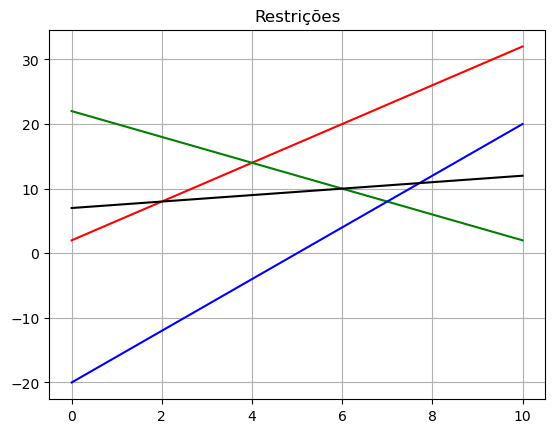

PyObject Text(0.5, 1.0, 'Restrições')

In [17]:
#=
-3x + y <= 2
4 x + 2 y ≤ 44.0
 4 x - y ≤ 20.0
 -x + 2 y ≤ 14.0

Solução com o gráfico

############### Usando Plots ########## -> não executa no meu pc, somente no jupyter online
f(x) = 3x + 2
g(x) = - 2x + 22
h(x) = - 20 + 4x 
w(x) = 7 + x/2

X = 0:8
#the_max = max(g(X[end]), h(X[1]))
plot(X, f, fill = (max(f(X[1])), 0.5, :auto))
plot(X, g, fill = (max(g(X[1])), 0.5, :auto))
plot(X, h, fill = (max(h(X[end])), 0.5, :auto))
plot(X, w, fill = (max(w(X[1])), 0.5, :auto))
=#

############ Usando PyPlot ############### -> executa pelo meu pc

clf()
x = range(0; stop=10, length=100)
f = 2 .+ 3x;
g = 22 .- 2x;
h = -20 .+ 4x;
w = 7 .+ 0.5x;

plot(x, f, color="red") 
plot(x, g, color="green") 
plot(x, h, color="blue") 
plot(x, w, color="black") 
grid("on")
title("Restrições")


In [3]:
#=2x + 3y &   \\
&-3x + y & \leq 2 \\
& 4x + 2y & \leq 44 \\
& 4x - y & \leq 20 \\
&- x+ 2y & \leq 14 \\
& 0      & \leq x,y
=#
m = Model(Clp.Optimizer)
@variable(m, x >= 0) 
@variable(m, y >= 0)

@constraint(m, -3x + y <= 2)
@constraint(m, 4x + 2y <= 44) 
@constraint(m, 4x - y <= 20 )
@constraint(m, - x+ 2y <= 14 )

@objective(m, Max, 2x + 3y)

optimize!(m)

println(m)

println("max:", objective_value(m))
println("x = ", value(x) )
println("y = ", value(y) )

Max 2 x + 3 y
Subject to
 -3 x + y <= 2.0
 4 x + 2 y <= 44.0
 4 x - y <= 20.0
 -x + 2 y <= 14.0
 x >= 0.0
 y >= 0.0

max:42.0
x = 6.0
y = 10.0
Coin0506I Presolve 4 (0) rows, 2 (0) columns and 8 (0) elements
Clp0006I 0  Obj 0 Dual inf 4.9999998 (2)
Clp0006I 2  Obj 42
Clp0000I Optimal - objective value 42
Clp0032I Optimal objective 42 - 2 iterations time 0.002


## Problema 3: (Poliedro convexo como conjunto viável $\{x: Ax \leq b\}$ )

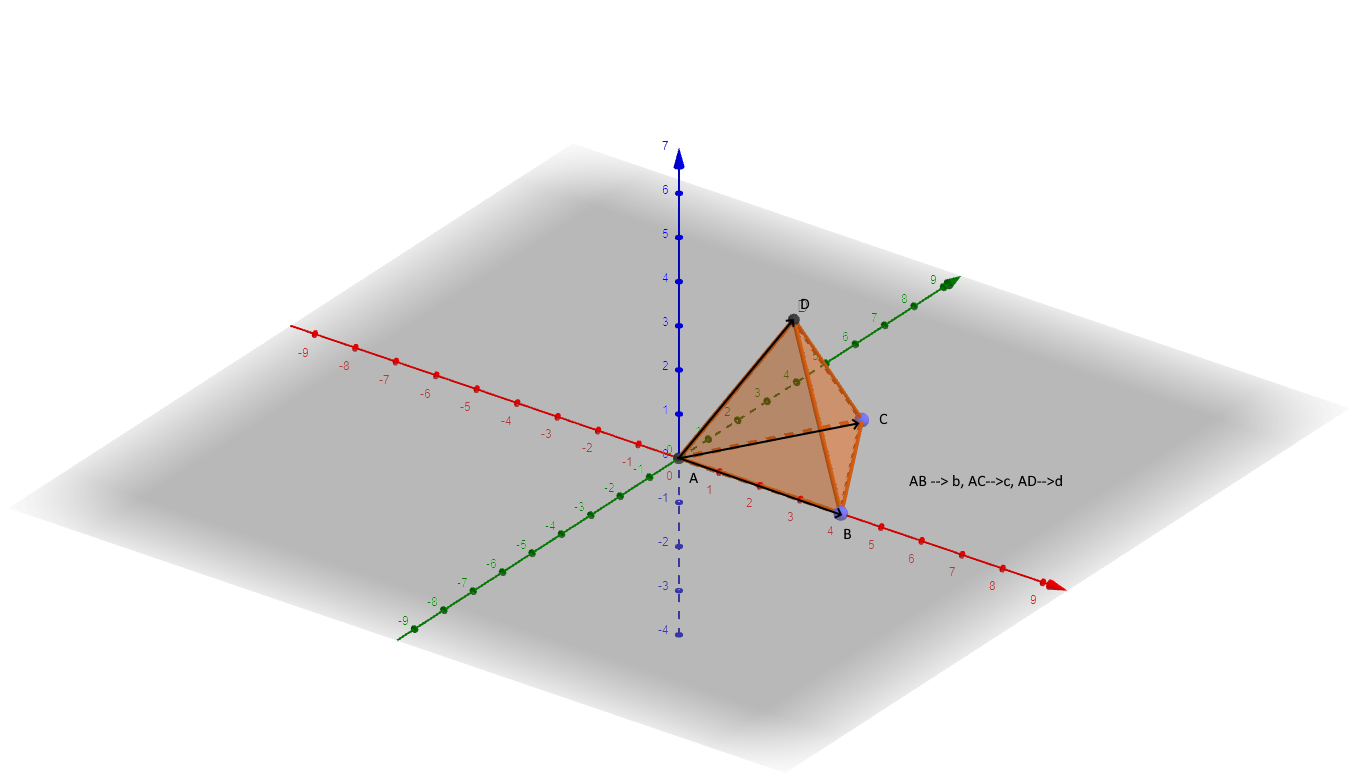
Foi visto em sala de aula que, para qualquer matriz $A \in R^{m \times n}$, $b \in R^m, x \in R^n$, o conjunto $\{x : Ax \leq b\}$ é um poliedro convexo. Este exercício pede para investigar o caminho inverso.
O tetraedro da figura acima possui vértices $A = (0,0,0)$, $B= (4,0,0)$, $C=(2,3.46,0)$ e $D= (2,1.15,3.27)$. Você consegue representá-lo na forma de um conjunto $\{x : Ax \leq b\}$? Caso afirmativo, mostre os cálculos levando à matriz $A$ e ao vetor $b$.

- Sugestão: Como o ponto $A$ está na origem, denotamos por $b,c,d$ os vetores $AB,AC,AD$. Três das quatro faces do tetraedro são combinações convexas de pares distintos dos vetores $b,c,d$, i.e., dos pares $\{b,c\}$, $\{b,d\}$ e $\{c,d\}$. A quarta face $BCD$ requer um pouco mais de trabalho...

### Solução do problema 3: Insira sua solução na célula abaixo!

In [11]:
# Equação de um plano -> ax + by + cz + d = 0

A = [0,0,0] 
B = [4,0,0] 
C = [2,3.46,0] 
D = [2,1.15,3.27]

m = Model(Clp.Optimizer)
@variable(m, x[1:3] >= 0 ) # vetor [x;y;z]

AB = B-A 
AD = D-A
AC = C-A
CB = AB - AC
CD = AD - AC
Bx = x - B # Onde P é um ponto qualquer dentro da face BCD

matrix_A = [cross(AB,AC)'; #vetor normal à face ABC aponta para dentro
            cross(AB,AD)';
            cross(AC,AD)';
            cross(CD,CB)'] 

b = [dot(cross(AB,AC),AB)
    dot(cross(AB,AD),AB)
    dot(cross(AC,AD),AC)
    dot(cross(CD,CB),AB)] 

display(b)
display(matrix_A*x) #A.x<=b
display(x) #x>=0


4-element Vector{Float64}:
  0.0
  0.0
  0.0
 45.2568

4-element Vector{AffExpr}:
 13.84 x[3]
 -13.08 x[2] + 4.6 x[3]
 11.3142 x[1] - 6.54 x[2] - 4.62 x[3]
 11.3142 x[1] + 6.54 x[2] + 4.62 x[3]

3-element Vector{VariableRef}:
 x[1]
 x[2]
 x[3]

## Problema 4: (Solução gráfica de PL parametrizado)

Encontre graficamente todos os valores do parâmetro $a$ tais que $(-3,4)$ seja a solução ótima do seguinte PL:
\begin{array}{rl}
    \text{maximize} & ax_1 + (2-a)x_2  \\
    \text{sujeito a}& 4x_1 + 3x_2 \leq 0 \\
              & 2x_1 + 3x_2       \leq 7 \\
              & x_1  + x_2        \leq 1
\end{array}
Verifique sua solução com código em JuMP.

### Solução do problema 4: Insira sua solução na célula abaixo!

In [49]:
m = Model(Clp.Optimizer)
a= 1
@variable(m, u >=0 )
@variable(m, v >=0 ) #x1=u-v
@variable(m, y >=0 )
@variable(m, z >=0 ) #x2=y-z
@constraint(m, (u-v) + (y-z) <=1) 
@constraint(m, 4(u-v) + 3(y-z) <= 0)
@constraint(m, 2(u-v) + 3(y-z) <= 7) 
@objective(m, Max, a*(u-v) + (2-a)*(y-z))

optimize!(m)

println(m)

println("max:", objective_value(m))
println("x1 = ", value(u-v) )
println("x2 = ", value(y-z) )


Max 1.1428571428571428 u - 1.1428571428571428 v + 0.8571428571428572 y - 0.8571428571428572 z
Subject to
 u - v + y - z <= 1.0
 4 u - 4 v + 3 y - 3 z <= 0.0
 2 u - 2 v + 3 y - 3 z <= 7.0
 u >= 0.0
 v >= 0.0
 y >= 0.0
 z >= 0.0

max:0.0
x1 = 0.0
x2 = 0.0
Coin0506I Presolve 3 (0) rows, 4 (0) columns and 12 (0) elements
Clp0006I 0  Obj 0 Dual inf 1.9999998 (2)
Clp0006I 4  Obj 0
Clp0000I Optimal - objective value 0
Clp0032I Optimal objective 0 - 4 iterations time 0.002


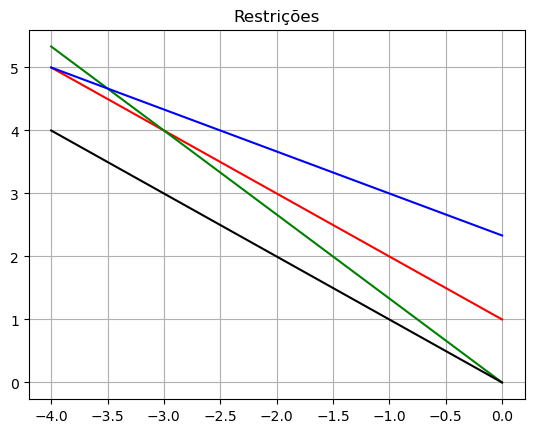

PyObject Text(0.5, 1.0, 'Restrições')

In [42]:
#=
Max -> (ax1 + (2-a)x2)
y = x2
x = x1

a = 1
x1 = -3 e x2 = 4
ax1 + (2-a)x2 -> x2 = -ax1/(2-a) 
=#

# A solução para 'a' está dentro do intervalo [1,8/7), já que a limitação inferior se dá pela reta c1(vermelha), e a superior se dá pela reta c2(verde).
# O coeficiente angular da reta c1 (-1) deve ser igual ao da reta de otimização c4 (preta, -a/(2-a) ), logo, temos:
# a/(2-a) = 1 => (2-a) = a => a=1
# E para o limitante superior, temos que o coeficiente angular da reta c2 (-4/3) deve ser igual a da c4, logo:
# a/(2-a) = 4/3 => (2-a)=3a/4 => a=2/(1+3/4)
# Isso porque o que limita 'a' é o ângulo entre as retas c1(vermelha) e c2(verde), qualquer angulação da reta de otimização que esteja entre ambas as retas,
# irá satisfazer o ponto (-3,4) .


clf()
a = 1
x = range(-4; stop=0, length=100)
c1 = 1 .- x;
c2 = 0 .- (4/3)x;
c3 = 7/3 .- (2/3)x;
c4 = -a*x/(2-a);

plot(x, c1, color="red") 
plot(x, c2, color="green") 
plot(x, c3, color="blue") 
plot(x, c4, color="black") 
grid("on")
title("Restrições")

## Problema 5 (Gerenciamento de processo): 

O produto de uma usina química é uma composição de dois produtos químicos, 1 e 2, na proporção 5:2 por peso. Estes produtos químicos, por sua vez, podem ser produzidos por três processos diferentes, utilizando duas matérias primas e combustível. Dados referentes à produção estão na tabela mostrada na célula abaixo. Por quanto tempo cada processo deve ser utilizado para maximizar a produção total (da composição) da usina?

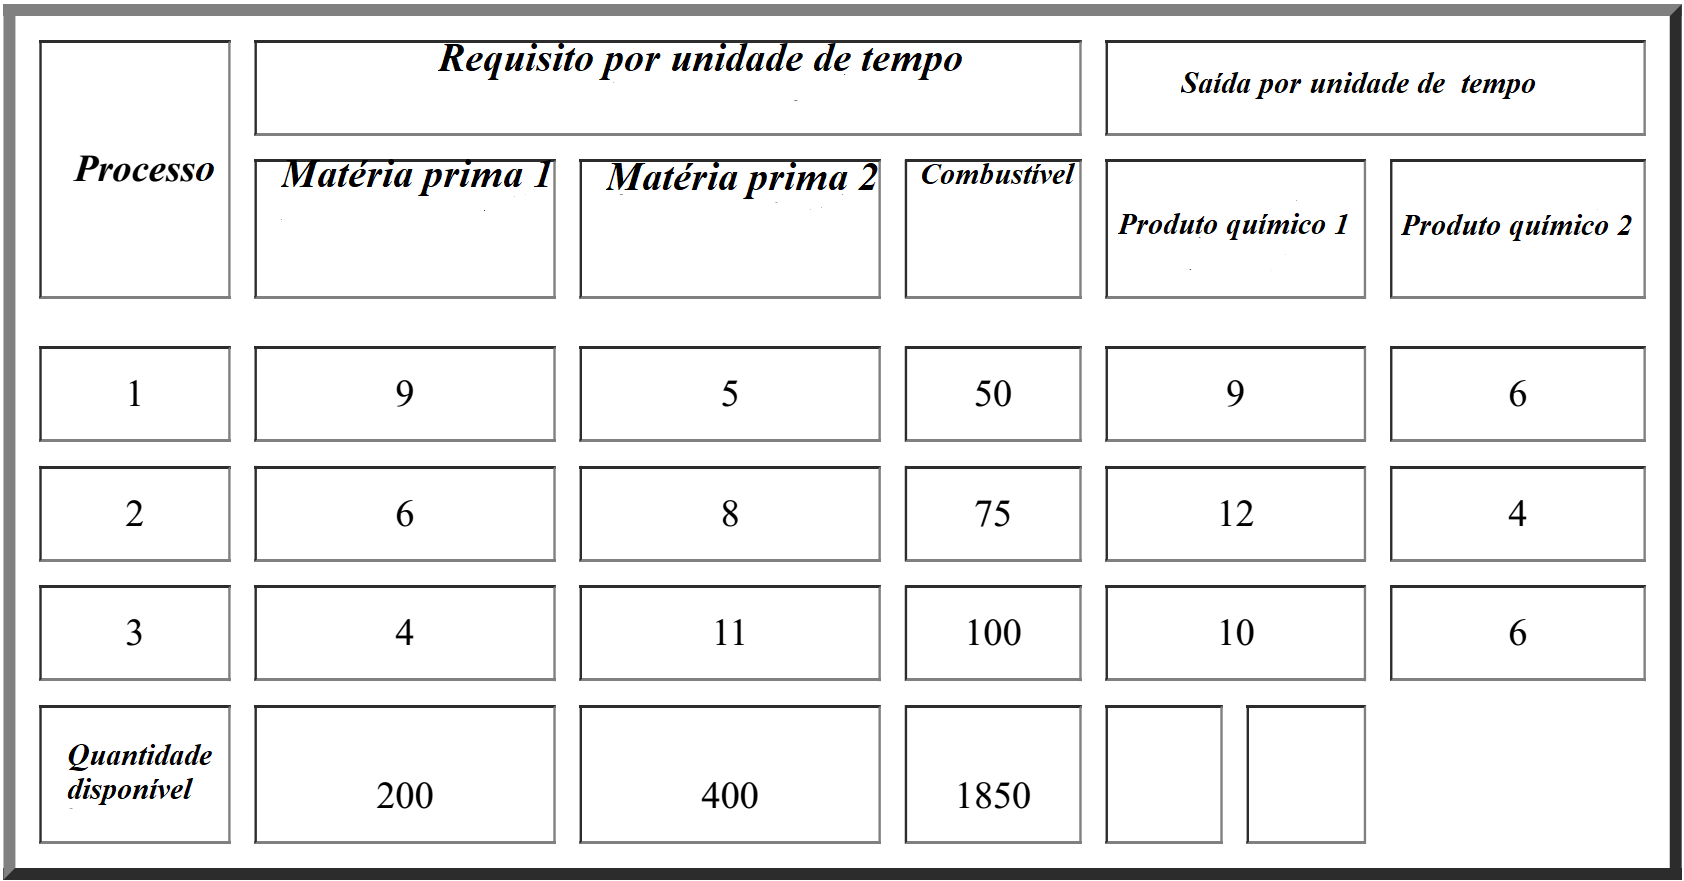

In [8]:
display("image/png", read("blending.png"))

### Solução do problem 5: Insira sua solução na célula abaixo!

In [26]:
# As colunas de A são as matérias primas e o combustível, A é uma matriz 3x3
A = 
[9 5 50;
 6 8 75; 
 4 11 100]

b = [200; 400; 1850] #quantidade máxima
c = [9 6; 12 4; 10 6]

m = Model(Clp.Optimizer)
@variable(m, x[1:3] >= 0 )  
# Como temos a quantidade p/ cada requisito nas colunas da matriz A, 
# A'*x<=b corresponde ao somatório dos tempos de cada requisito ser menor ou igual a cada b
@constraint(m, A'*x .<= b ) 
@objective(m, Max, dot(c*[5;2],x) )   

optimize!(m)

println(m)

println("Máx: ", objective_value(m))
println("Tempo do Processo 1 = ", value(x[1]) )
println("Tempo do Processo 2 = ", value(x[2]) )
println("Tempo do Processo 3 = ", value(x[3]) )
println()

Max 57 x[1] + 68 x[2] + 62 x[3]
Subject to
 9 x[1] + 6 x[2] + 4 x[3] <= 200.0
 5 x[1] + 8 x[2] + 11 x[3] <= 400.0
 50 x[1] + 75 x[2] + 100 x[3] <= 1850.0
 x[1] >= 0.0
 x[2] >= 0.0
 x[3] >= 0.0

Máx: 1798.666666666667
Tempo do Processo 1 = 10.4
Tempo do Processo 2 = 17.733333333333334
Tempo do Processo 3 = 0.0

Coin0506I Presolve 3 (0) rows, 3 (0) columns and 9 (0) elements
Clp0006I 0  Obj 0 Dual inf 209.66667 (3)
Clp0006I 2  Obj 1798.6667
Clp0000I Optimal - objective value 1798.6667
Clp0032I Optimal objective 1798.666667 - 2 iterations time 0.002


## Problema 6 (Produção de vinho)
Um produtor de vinho produz dois tipos de vinho, suave (V) e seco (S),  obtendo 5 reais de lucro por litro de vinho suave e 4 reais por litro de vinho seco. Vinho suave requer 3 caixas de uvas, 4 kg de açúcar e 2 unidades de extrato por litro. Vinho seco requer 4 caixas de uvas, 3 kg de açúcar e 1 unidade de extrato por litro. Ele possui 14 caixas de uvas, 8 kg de açúcar e 6 unidades de extrato e quer utilizar estes insumos para maximizar seu lucro. 
1. Formule o problema e ajude o produtor a determinar o esquema de produção ótimo. 
2. Mantendo este esquema ótimo:
    - determine a variação de preço por litro de vinho seco que ele pode admitir sem ter prejuízo. 
    - determine o número mínimo de caixas de uva ele necessita para continuar lucrando.
3. Supondo que, no problema original, o vinho suave passa a requerer $7\frac{1}{2}$ unidades de extrato. Analise a sensibilidade da solução ótima diante desta mudança.

### Solução do problem 6: Insira sua solução na célula abaixo!

In [23]:
#PARTE 1

vinhos = [:suave, :seco]
ingredientes = [:caixa, :acucar, :extrato]

#5 reais de lucro por litro de vinho suave e 4 reais por litro de vinho seco.
lucro = Dict( zip( vinhos, [ 5, 4 ] ) )

# 14 caixas de uvas, 8 kg de açúcar e 6 unidades de extrato 
quant_disp = Dict( zip( ingredientes, [14, 8, 6] ) )

#suave->3 caixas de uvas, 4 kg de açúcar e 2 unidades de extrato por litro. -> 7,5 unidades de extrato
#seco->4 caixas de uvas, 3 kg de açúcar e 1 unidade de extrato por litro. 

#recipe_mat = [ 3 4 2;4 3 1 ] #->problema original
recipe_mat = [ 3 4 7.5; 4 3 1 ] # -> parte 3
receita = NamedArray( recipe_mat, (vinhos,ingredientes), ("vinho","ingrediente",) )

m = Model(Clp.Optimizer)

@variable(m, insumo[vinhos] >= 0 )
@expression(m, lucro_total, sum( lucro[s]*insumo[s] for s in vinhos) )
@constraint(m, constr[i in ingredientes], sum( receita[s,i]*insumo[s] for s in vinhos ) <= quant_disp[i] )
@objective(m, Max, lucro_total)

optimize!(m)
println("Litros de vinho suave: ",JuMP.value.(insumo[:suave]))
println("Litros de vinho seco: ",JuMP.value.(insumo[:seco]))
println("O lucro total é: \$", JuMP.value.(lucro_total))
println()

#PARTE 2.1

println("Para qualquer quantidade de vinho seco produzido e vendido em litros gerará lucro. (venda>0)")

#PARTE 2.2

println("Para obter lucro, o mínimo de caixas de uva a serem usadas para produzir e vender vinho seco é de 4.")

#PARTE 3

println("Como podemos observar com o resultado, não houve qualquer mudança no lucro, portanto a solução ótima não é sensível a essa mudança.")
println()


Litros de vinho suave: 0.0
Litros de vinho seco: 2.666666666666666
O lucro total é: $10.666666666666664

Para qualquer quantidade de vinho seco produzido e vendido em litros gerará lucro. (venda>0)
Para obter lucro, o mínimo de caixas de uva a serem usadas para produzir e vender vinho seco é de 4.
Como podemos observar com o resultado, não houve qualquer mudança no lucro, portanto a solução ótima não é sensível a essa mudança.

Coin0506I Presolve 3 (0) rows, 2 (0) columns and 6 (0) elements
Clp0006I 0  Obj 0 Dual inf 5.2898433 (2)
Clp0006I 2  Obj 10.666667
Clp0000I Optimal - objective value 10.666667
Clp0032I Optimal objective 10.66666667 - 2 iterations time 0.002


## Problema 7 (Escalação de entrevistas)

A empresa startup Doodle quer agendar entrevistas para um candidato para a posição de engenheiro de software.

O dia de trabalho disponível, entre 10 e 15h, está dividido em  intervalos de 20 minutos que podem ser utilizados para entrevistas individuais.

Também há um intervalo de uma hora no meio do dia quando 3 pesquisadores levam o candidato para o almoço.

Idealmente todos os 15 pesquisadores da empresa deveriam ter um encontro (almoço ou entrevista) com o candidato durante o dia, mas como todos tem agendas cheias, não está claro que isto seria possível.

Como primeiro passo, foi feita uma enquete com os 15 pesquisadores para saber da disponibilidade de cada um.

O resultado está mostrado na tabela abaixo, na qual um elemento um (1) em uma célula indica disponibilidade no horário associado à célula, e um zero (0) indica indisponibilidade.

Determinar se  existe um agendamento viável e,  caso afirmativo, gerar uma agenda para o candidato, indicando qual pesquisador encontraria em qual intervalo.

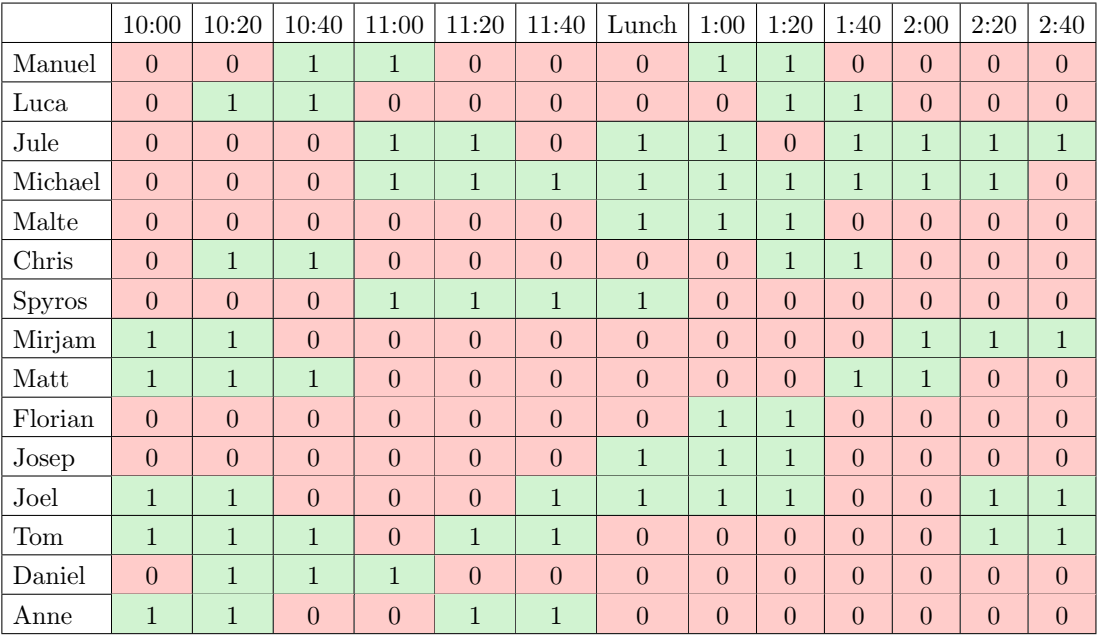

In [16]:
display("image/png", read("doodle.png"))
#![image.png](attachment:image.png)

### Solução do problem 7: Insira sua solução na célula abaixo!

In [4]:
raw = [
0 0 1 1 0 0 0 1 1 0 0 0 0
0 1 1 0 0 0 0 0 1 1 0 0 0
0 0 0 1 1 0 1 1 0 1 1 1 1
0 0 0 1 1 1 1 1 1 1 1 1 0
0 0 0 0 0 0 1 1 1 0 0 0 0
0 1 1 0 0 0 0 0 1 1 0 0 0
0 0 0 1 1 1 1 0 0 0 0 0 0
1 1 0 0 0 0 0 0 0 0 1 1 1
1 1 1 0 0 0 0 0 0 1 1 0 0
0 0 0 0 0 0 0 1 1 0 0 0 0
0 0 0 0 0 0 1 1 1 0 0 0 0
1 1 0 0 0 1 1 1 1 0 0 1 1
1 1 1 0 1 1 0 0 0 0 0 1 1
0 1 1 1 0 0 0 0 0 0 0 0 0
1 1 0 0 1 1 0 0 0 0 0 0 0]

intervals = ["10:00","10:20","10:40","11:00","11:20","11:40","lunch","13:00","13:20","13:40","14:00","14:20","14:40"]
names = ["Manuel", "Luca", "Jule", "Michael", "Malte", "Chris", "Spyros", "Mirjam", "Matt", "Florian", "Josep", "Joel", "Tom", "Daniel", "Anne"];

times = NamedArray( raw, (names,intervals), ("name","intervals"))

m = Model(Clp.Optimizer)
@variable(m, x[names,intervals] >= 0) 

#@constraint(m, hours[j in intervals], sum(x[i,j] for i in names) == 1 ) 
#@constraint(m, for i in intervals if i=="lunch" sum(x[:,i]) == 3 else  sum(x[:,i]) == 1 end end)  
#parse_constraint_head(::Function, ::Val{:for}, args...) 

for n in names
    @constraint(m, sum(x[n, :]) == 1)
end

for t in intervals
    if t == "lunch"
        @constraint(m, sum(x[:,t]) <= 3)   
    else
        @constraint(m, sum(x[:,t]) == 1)  
    end
end

@objective(m, Max, sum( x[i,j]*times[i,j] for i in names, j in intervals ) )
optimize!(m)
x_opt = JuMP.value.(x)
assignment = NamedArray( [ (x_opt[i,j]) for i in names, j in intervals ], (names,intervals), ("name","intervals"))

show(assignment)
println()
println()


15×13 Named Matrix{Float64}
name ╲ intervals │ 10:00  10:20  10:40  11:00  11:20  11:40  lunch  13:00  13:20  13:40  14:00  14:20  14:40
─────────────────┼──────────────────────────────────────────────────────────────────────────────────────────
Manuel           │   0.0    0.0    0.0    1.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0
Luca             │   0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    1.0    0.0    0.0    0.0
Jule             │   0.0    0.0    0.0    0.0    0.0    0.0    1.0    0.0    0.0    0.0    0.0    0.0    0.0
Michael          │   0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    1.0    0.0
Malte            │   0.0    0.0    0.0    0.0    0.0    0.0    1.0    0.0    0.0    0.0    0.0    0.0    0.0
Chris            │   0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    1.0    0.0    0.0    0.0    0.0
Spyros           │   0.0    0.0    0.0    0.0    1.0    0.0    0.0    0.0    0.0    0.0    0.0    0.

## Problema 8 (Grid elétrico com armazenamento de energia)

A cidade Varre-Sai compra sua energia elétrica da utilidade Ampla que cobre por hora. Se for utilizado menos de 50MWh durante uma determinada hora do dia,  o custo é 100 reais por MWh. Qualquer excedente (além de 50 MWh) durante esta hora custa 400 reais por MWh. A energia máxima que Ampla pode fornecer (em qualquer intervalo de uma hora) é 75 MWh. As tabelas abaixo mostram a demanda diária média hora a hora para a cidade Varre-Sai durante o mes de janeiro.

| Hora do dia (manhã) | 01 | 02 | 03 | 04 | 05 | 06 | 07 | 08 | 09 | 10| 11| 12|
|:-------------------:|:-:|:-:|:-:|:-:|:-:|:-:|:-:|:-:|:-:|:-:|:-:|:-:|
| Demanda (MWh)       | 43| 40| 36| 36| 35| 38| 41| 46| 49| 48| 47| 47|

| Hora do dia ( tarde )| 13| 14| 15| 16| 17| 18| 19| 20| 21| 22| 23| 24|
|:-------------------:|:-:|:-:|:-:|:-:|:-:|:-:|:-:|:-:|:-:|:-:|:-:|:-:|
| Demanda (MWh)       | 48| 46| 45| 47| 50| 63| 75| 75| 72| 66| 57| 50|

O prefeito de Varre-Sai está preocupado com o gasto alto na parte da tarde e o risco de blecautes por volta de 19h por conta da demanda média alta (perigosamente) próxima ao limite de 75 MWh estipulado pela Ampla.

Para contornar estes problemas potenciais, o prefeito comprou uma bateria grande com capacidade de armazenamento de 30 MWh. A ideia seria comprar mais energia (do que a demanda na primeira parte do dia, quando energia custa menos), armazenar na bateria e utilizar nos horários de pico mais tarde, quando tanto a demanda como o preço atingem valores altos.
1. Quanto dinheiro a cidade de Varre-Sai poderia economizar graças a bateria? Suponha que a bateria começa o dia completamente descarregada, e que, para maior segurança em relação aos  blecautes, limita-se a 65 MWh a quantidade de eletricidade comprada por hora.
2. Quanto dinheiro seria economizado se a bateria tivesse capacidade infinita?
3. Plote um gráfico que mostra:
     1. a demanda de energia típica (da tabela) versus a hora do dia.
     2. a eletricidade comprada utilizando a estratégia encontrada no item 1 versus a hora do dia (plote ambos os gráficos nos mesmos eixos).

### Solução do problem 8: Insira célula com a sua solução!

Custo sem o uso de bateria: R$ 152400
Custo com o uso de bateria: R$ 143400.0
Economia:                   R$ 9000.0

Coin0506I Presolve 21 (-4) rows, 62 (-11) columns and 82 (-15) elements
Clp0006I 0  Obj 69329.993 Primal inf 727.80002 (21)
Clp0006I 31  Obj 137129.99 Primal inf 181.90001 (10)
Clp0006I 48  Obj 143400
Clp0000I Optimal - objective value 143400
Coin0511I After Postsolve, objective 143400, infeasibilities - dual 0 (0), primal 0 (0)
Clp0032I Optimal objective 143400 - 48 iterations time 0.002, Presolve 0.00


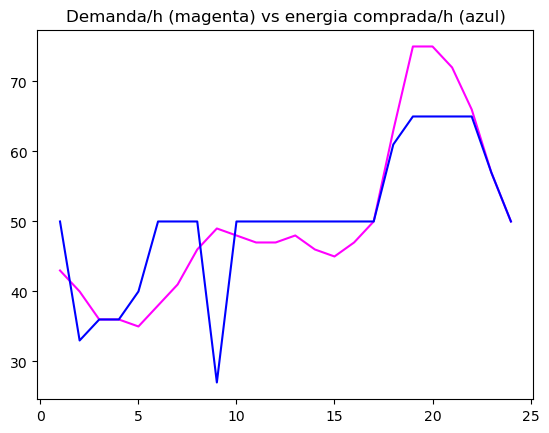

PyObject Text(0.5, 1.0, 'Demanda/h (magenta) vs energia comprada/h (azul)')

In [17]:
# Parte 1

preco   = 100 # preço normal por hora
excedente  = 400 # acima de 50MWh
demanda = [43, 40, 36, 36, 35, 38, 41, 46, 49, 48, 47, 47, 48, 46, 45, 47, 50, 63, 75, 75, 72, 66, 57, 50]
lim_bateria = 30
custo = 0

for i in demanda
    if i <= 50
        custo += i*preco
    else 
        custo += (i-50)*excedente + 50*preco
    end 
end 

m = Model(Clp.Optimizer)
@variable(m, 0 <= bateria[1:25] <= 30) # carga inicial + 24 horas -> com limite para a carga da bateria de 30MWh
@variable(m, 0 <= compra_normal[1:24] <= 50) # energia comprada no preço normal -> 100 
@variable(m, 0 <= compra_exc[1:24] <= 15) # energia comprada no preço mais caro -> 400 
# A compra de ambas as energias não pode ultrapassar de 65MWh 

@constraint(m, bateria[1] == 0) # A bateria começa o dia sem carga

# Compra-se energia para atingir a demanda e carregar a bateria
@constraint(m, [i in 1:24], compra_normal[i] + compra_exc[i] + bateria[i] == demanda[i] + bateria[i+1]) 

@objective(m, Min, sum(compra_normal*preco) + sum(compra_exc*excedente)) # minimiza o custo total com o uso da bateria  

optimize!(m)
println("Custo sem o uso de bateria: R\$ ", custo)
println("Custo com o uso de bateria: R\$ ", JuMP.objective_value.(m))
println("Economia:                   R\$ ", custo - JuMP.objective_value.(m)) 
println()

# Parte 3
# 1. a demanda de energia típica (da tabela) versus a hora do dia.
# 2. a eletricidade comprada utilizando a estratégia encontrada no item 1 versus a hora do dia (plote ambos os gráficos nos mesmos eixos).

clf()
t = range(start = 1; stop=24, length=24)
plot(t, demanda, color="magenta")
plot(t, JuMP.value.(compra_normal) .+ JuMP.value.(compra_exc), color="blue")
title("Demanda/h (magenta) vs energia comprada/h (azul)")

## Problema 9 (Construção de um estádio esportivo [sob regime de anti-propina!])
Uma cidade pequena deseja construir um estádio (também pequeno). Após licitação, uma empreiteira ganha o contrato e deseja cumprir a tarefa no menor tempo possível. Todas as grandes tarefas estão listadas na tabela abaixo. Algumas podem ser iniciadas apenas quando as tarefas predecessoras tiverem sido concluídas e esta dependência está registrada na quarta coluna.

|Tarefa | Descrição | Duração (em semanas)| Tarefas predecessoras | Redução máxima (em semanas)| Custo da redução (R\$1k/semana) |
|:---:|:----------:|:------------------:|:------------:|:---------------------------:|:---------------------------:|
|1 |Instalação no local de construção |2 | não há | 0 | -- |
| 2| Terraplenagem | 16 | 1 | 3 | 30 |
|3 |Construção da fundação | 9 | 2 | 1 | 26 |
| 4 |Ruas de acesso e outras redes | 8 | 2 | 2 | 12 |
| 5 | Construir o porão | 10 | 3 | 2 | 17 |
| 6 | Piso principal | 6 | 4,5 | 1 | 15 |
| 7 | Divisão do vestiário | 2 | 4 | 1 | 8 |
| 8 | Instalação elétrica nas arquibancadas | 2 | 6 | 0 | -- |
|9  | Construção da cobertura | 9 | 4,6 | 2 | 42 |
|10 | Iluminação do estádio | 5 | 4 | 1 | 21 |
| 11 | Instalações nas arquibancadas | 3 | 6 | 1 |18 |
| 12 | Impermeabilização da cobertura | 2 | 9 | 0 | -- |
| 13 | Acabamento do vestiário | 1 | 7 | 0 | -- |
| 14 | Construção da bilheteria | 7 | 2 | 2 | 22 |
| 15 | Ruas de acesso secundárias | 4 | 4,14 | 2 | 12 |
|16  | Placar e altofalantes |3 | 8,11,14 | 1 | 6 |
|17 | Gramado e acessórios para esportes | 9 | 12 | 3 | 16 |
|18 | Entrega do estádio | 1 | 17 | 0 | -- |

As perguntas que a empreiteira quer que sejam respondidas são as seguintes:
1. Qual a data mais cedo para o término da construção? Note que as últimas duas colunas não são  relevantes para este item. 
2. Para algumas tarefas a empreiteira pode contratar operários extra e alugar mais equipamento para reduzir o tempo total. As últimas duas colunas mostram o número máximo de semanas poupadas por tarefa e o custo adicional associado por semana, por conta do trabalho extra. Plote um gráfico de compromisso ("tradeoff") mostrando o custo extra em função do número de semanas poupadas.
3. A prefeitura da cidade gostaria que a obra fosse terminada antes da data combinada e anunciada (resposta do item  1). Como incentivo, a prefeitura propõe pagar um bônus de R\$30k por cada semana de antecipação da data de término da obra. Quando terminará o projeto se a empreiteira deseja maximizar seu lucro?

### Solução do problem 9: Insira sua solução na célula abaixo!

In [18]:
# Parte 1

tasks = []
for i = 1:18
    push!(tasks, string(i))    
end

# this dictionary stores the project durations
dur = [2, 16, 9, 8, 10, 6, 2, 2, 9, 5, 3, 2, 1, 7, 4, 3, 9, 1]
duration = Dict(zip(tasks,dur))

# this dictionary stores the projects that a given project depends on (ancestors)
pre = ( [], ["1"], ["2"], ["2"], ["3"], ["4","5"], ["4"], ["6"], ["4","6"], ["4"], ["6"], ["9"],
    ["7"], ["2"], ["4","14"], ["8","11","14"], ["12"], ["17"])

pred = Dict(zip(tasks,pre)); #Predecessor graph information

m = Model(Clp.Optimizer)

@variable(m, t_start[tasks])

@constraint(m, [i in tasks, j in pred[i]], t_start[i] >= t_start[j] + duration[j])
@constraint(m, t_start["1"] == 0)
# total duration is start time of last task + duration of last task.
@objective(m, Min, t_start["18"] + duration["18"])     

optimize!(m)
println(JuMP.value.(t_start))
println("minimum duration: ", JuMP.objective_value(m))

1-dimensional DenseAxisArray{Float64,1,...} with index sets:
    Dimension 1, Any["1", "2", "3", "4", "5", "6", "7", "8", "9", "10", "11", "12", "13", "14", "15", "16", "17", "18"]
And data, a 18-element Vector{Float64}:
  0.0
  2.0
 18.0
 18.0
 27.0
 37.0
 26.0
 43.0
 43.0
 26.0
 43.0
 52.0
 28.0
 18.0
 26.0
 46.0
 54.0
 63.0
minimum duration: 64.0
Coin0506I Presolve 0 (-23) rows, 0 (-18) columns and 0 (-45) elements
Clp3002W Empty problem - 0 rows, 0 columns and 0 elements
Clp0000I Optimal - objective value 64
Coin0511I After Postsolve, objective 64, infeasibilities - dual 0 (0), primal 0 (0)
Clp0032I Optimal objective 64 - 0 iterations time 0.002, Presolve 0.00


[0, 90, 116, 140, 174, 189, 197, 197, 281, 302, 320, 320, 320, 364, 388, 394, 442, 442]



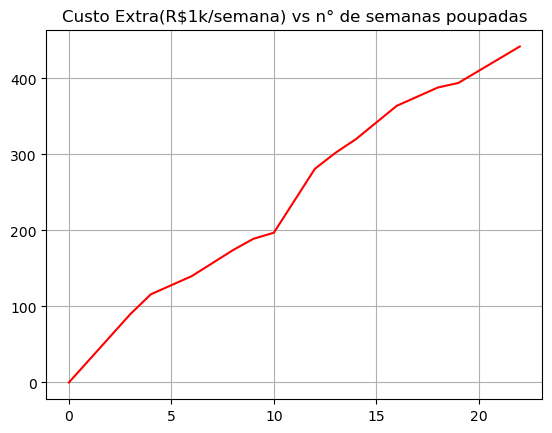

In [19]:
# Parte 2
#Plote um gráfico de compromisso ("tradeoff") mostrando o custo extra em função do número de semanas poupadas.

red_max = [0,3,1,2,2,1,1,0,2,1,1,0,0,2,2,1,3,0] # x -> em semanas
custo_red = [0,30,26,12,17,15,8,0,42,21,18,0,0,22,12,6,16,0] # y -> R$1k/semana 
 
custo = custo_red.*red_max 
custo = [sum(custo[1:i]) for i in 1:18] # custo cumulativo ao longo do tempo
red_max = [sum(red_max[1:i]) for i in 1:18] 

println(custo)

plot(red_max,custo, color = "red") 
grid("on")
title("Custo Extra(R\$1k/semana) vs n° de semanas poupadas")
println()


In [20]:
# Parte 3
# bônus de R\$30k por cada semana de antecipação 
# Quando terminará o projeto se a empreiteira deseja maximizar seu lucro?

tasks = []
for i = 1:18
    push!(tasks, string(i))  
end

dur = [2, 16, 9, 8, 10, 6, 2, 2, 9, 5, 3, 2, 1, 7, 4, 3, 9, 1]
red_max = [0,3,1,2,2,1,1,0,2,1,1,0,0,2,2,1,3,0] # x -> em semanas
custo_red = [0,30,26,12,17,15,8,0,42,21,18,0,0,22,12,6,16,0] # y -> R$1k/semana 

pre = ( [], ["1"], ["2"], ["2"], ["3"], ["4","5"], ["4"], ["6"], ["4","6"], ["4"], ["6"], ["9"],
    ["7"], ["2"], ["4","14"], ["8","11","14"], ["12"], ["17"])

pred = Dict(zip(tasks,pre)); 

m = Model(Clp.Optimizer)

@variable(m, t_start[tasks])

@constraint(m, t_start["1"] == 0)

# Se o custo de redução ultrapassa 30k por semana, então não é viável economicamente de fazer a redução para a tarefa em questão
# Porém, se for igual ou menor, então será viável.

for i in 1:18
    if custo_red[i] <= 30
        dur[i] = dur[i]-red_max[i]
    else
        dur[i] = dur[i]
    end
end

duration = Dict(zip(tasks,dur))

@constraint(m, [i in tasks, j in pred[i]], t_start[i] >= t_start[j] + duration[j])

@objective(m, Min, t_start["18"] + duration["18"])    

optimize!(m)
println(JuMP.value.(t_start)) # Mostra o acúmulo de semanas ao longo do tempo
println()
println("Total de semanas depois da redução: ", JuMP.objective_value(m))
println("Lucro ao reduzir o número de semanas: R\$ ", 30*(64-JuMP.objective_value(m)), "k")
println()

# São 52 semanas com o máximo de reduções porém com prejuízo, logo não viável.
# E são 54 semanas com redução de semanas obtendo lucro
# Sem redução, são 64 semanas

1-dimensional DenseAxisArray{Float64,1,...} with index sets:
    Dimension 1, Any["1", "2", "3", "4", "5", "6", "7", "8", "9", "10", "11", "12", "13", "14", "15", "16", "17", "18"]
And data, a 18-element Vector{Float64}:
  0.0
  2.0
 15.0
 15.0
 23.0
 31.0
 21.0
 36.0
 36.0
 21.0
 36.0
 45.0
 22.0
 15.0
 21.0
 38.0
 47.0
 53.0

Total de semanas depois da redução: 54.0
Lucro ao reduzir o número de semanas: R$ 300.0k

Coin0506I Presolve 0 (-23) rows, 0 (-18) columns and 0 (-45) elements
Clp3002W Empty problem - 0 rows, 0 columns and 0 elements
Clp0000I Optimal - objective value 54
Coin0511I After Postsolve, objective 54, infeasibilities - dual 0 (0), primal 0 (0)
Clp0032I Optimal objective 54 - 0 iterations time 0.002, Presolve 0.00


## Problema 10: (Clássico: dieta ótima)

Suponha que uma certa dieta alimentar esteja baseada nos alimentos (em parêntesis vemos as unidades utilizadas): 
leite desnatado (litro) , carne magra de boi (Kg), carne de frango (kg) e batata doce (100 g). 
Sabendo-se que os requisitos nutricionais serão expressos em termos de vitaminas A,C, e D e controlados por 
suas quantidades mínimas (em miligramas), uma vez que são indispensáveis à preservação da saúde da pessoa 
que estará se submetendo a dieta. A Tabela abaixo resume a quantidade de cada vitamina em disponibilidade 
**em cada unidade considerada dos alimentos**, sua necessidade diária para a boa saúde de uma pessoa e o custo 
(em reais) de cada unidade do alimento considerado. Modele e resolva o problema de forma a minimizar os gastos com a 
compra dos alimentos, obedecendo às quantidades mínimas recomendadas em relação às vitaminas.

Tabela: Dados do problema da dieta

|Alim.$\rightarrow$|leite | carne |frango | batata | Qtd. Mín. |
|------------------|------|-------|-------|--------|-----------|
|Vit.$\downarrow$ |  
|A |2 |2 |5 |4 |11 |
|C |50 | 20 | 10 | 45| 70 |
|D |80 |70 |10 |60 |250|
| |
|Custo $\rightarrow$ |5 |40 |20 |2 |




### Solução do problem 10: Insira sua solução na célula abaixo!

In [7]:
# As colunas de A sao os alimentos A é uma matriz 3x4
A = 
[2 2 5 4;
 50 20 10 45; 
 80 70 10 60;]

b = [11; 70; 250]
c = [5; 40; 20; 2]

m = Model(Clp.Optimizer)
@variable(m, x[1:4] >= 0 )      
@constraint(m, A*x .>= b )      
@objective(m, Min, dot(c,x) )   

optimize!(m)

println(m)

println("Custo: R\$", objective_value(m))
println("Leite = ", value(x[1]) )
println("Carne = ", value(x[2]) )
println("Frango = ", value(x[3] ))
println("Batata = ", value(x[4] ))

Min 5 x[1] + 40 x[2] + 20 x[3] + 2 x[4]
Subject to
 2 x[1] + 2 x[2] + 5 x[3] + 4 x[4] >= 11.0
 50 x[1] + 20 x[2] + 10 x[3] + 45 x[4] >= 70.0
 80 x[1] + 70 x[2] + 10 x[3] + 60 x[4] >= 250.0
 x[1] >= 0.0
 x[2] >= 0.0
 x[3] >= 0.0
 x[4] >= 0.0

Custo: R$8.333333333333332
Leite = 0.0
Carne = 0.0
Frango = 0.0
Batata = 4.166666666666666
Coin0506I Presolve 3 (0) rows, 4 (0) columns and 12 (0) elements
Clp0006I 0  Obj 0 Primal inf 6.7249997 (3)
Clp0006I 1  Obj 8.3333333
Clp0000I Optimal - objective value 8.3333333
Clp0032I Optimal objective 8.333333333 - 1 iterations time 0.002
